In [83]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


def generate_non_linear_points(m=200):
    circle_data = np.random.normal(0, 1, (m, 2))
    circle_class = [[], [], []]
    circle_labels = []
    circle_labels_indices = [[], [], []]
    for i, point in enumerate(circle_data):
        x = point[0]
        y = point[1]
        # x**2 + y**2 = 1
        if np.sqrt(x**2 + y**2) < 0.5:
            circle_labels.append(0)
            circle_class[0].append((x, y))
            circle_labels_indices[0].append(i)
        elif np.sqrt(x**2 + y**2) < 1:
            circle_labels.append(1)
            circle_class[1].append((x, y))
            circle_labels_indices[1].append(i)
        else:
            circle_labels.append(2)
            circle_class[2].append((x, y))
            circle_labels_indices[2].append(i)
    return circle_data,circle_class,circle_labels

def plot_data(data):
    plt.scatter(np.array(data[0])[:, :1], np.array(data[0])[:, 1:], color='red')
    plt.scatter(np.array(data[1])[:, :1], np.array(data[1])[:, 1:], color='blue')


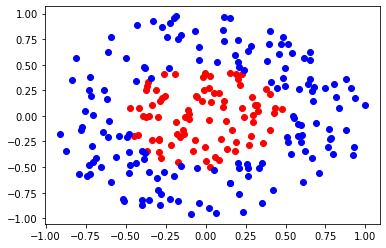

In [84]:
matrix_m=600
circle_data,circle_points,circle_labels = generate_non_linear_points(matrix_m)
plot_data(circle_points)

In [85]:
unique_classes=set(circle_labels)
unique_classes


{0, 1, 2}

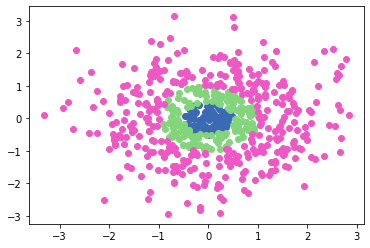

In [86]:
# inner circles
for i, point in enumerate(circle_points):
    plt.scatter(np.array(circle_points[i])[:, :1], np.array(circle_points[i])[:, 1:], color=np.random.rand(3,))
    

In [87]:
# kernel 
def polynomial_kernel(x, y, d=3):
    return (1 + np.dot(x.T, y)) ** d

degree =6
chosen_kernel=polynomial_kernel

kernel_matrix = []
for i in range(len(circle_data)):
    kernel_matrix.append([])
    for j in range(len(circle_data)):
        kernel_matrix[i].append(chosen_kernel(np.reshape(circle_data[i], (2, 1)), np.reshape(circle_data[j], (2, 1)),d=degree)[0][0])
kernel_matrix = np.array(kernel_matrix)

In [88]:
kernel_matrix

array([[8.56616447e+03, 2.77262085e-01, 6.56651950e-02, ...,
        4.69326868e+03, 1.73278244e+00, 4.10861840e-02],
       [2.77262085e-01, 1.19434012e+02, 1.25353696e+02, ...,
        2.49405611e-03, 1.56018074e-01, 1.93245444e-04],
       [6.56651950e-02, 1.25353696e+02, 1.48919398e+02, ...,
        6.79959229e-06, 8.21356710e-02, 5.70450887e-06],
       ...,
       [4.69326868e+03, 2.49405611e-03, 6.79959229e-06, ...,
        3.38875100e+03, 6.15148511e-01, 4.28434136e-07],
       [1.73278244e+00, 1.56018074e-01, 8.21356710e-02, ...,
        6.15148511e-01, 2.48751144e+00, 2.50870541e+01],
       [4.10861840e-02, 1.93245444e-04, 5.70450887e-06, ...,
        4.28434136e-07, 2.50870541e+01, 6.14461128e+03]])

In [89]:
class_kernel_matrix = [[] for i in range(len(circle_points))]
for i, l in enumerate(circle_labels):
    class_kernel_matrix[l].append(kernel_matrix[i])

class_kernel_matrix

[[array([3.99387002e+00, 1.96257438e+00, 3.35459080e+00, 3.25250228e-01,
         1.25006123e-09, 2.48844679e+00, 3.91413850e-02, 1.16015212e+00,
         1.28664143e+00, 3.36453519e-02, 4.81218557e+00, 2.25259414e-01,
         3.17290846e+01, 3.58049931e+00, 4.18451333e-04, 3.60558051e+00,
         4.20699484e-13, 2.03456549e-01, 1.02903877e+00, 2.34994954e-03,
         7.89533602e-04, 4.51763231e-01, 6.34351726e+00, 2.08099924e-03,
         6.13092169e+00, 1.91555178e+01, 3.27231018e-15, 6.03999366e-01,
         2.21462821e+00, 2.36083966e-03, 4.14872373e+00, 4.18751982e+00,
         2.91924058e+00, 1.97788120e-04, 6.02908033e-01, 8.24680931e-02,
         3.43906040e-09, 2.49076909e-08, 1.36059161e-06, 6.78477826e-03,
         6.85199025e-08, 2.18205586e-01, 1.43752478e-03, 3.02517055e-03,
         1.38967941e-01, 7.76120625e-01, 2.21071256e+01, 2.29391300e-01,
         1.22401381e-01, 1.25201015e+01, 1.70860712e+01, 5.97349896e-01,
         1.92122619e-02, 3.21916147e-04, 1.08382466

In [90]:
k_matrix = np.mean(kernel_matrix, axis=0)

(84, 84)
(155, 155)
(361, 361)


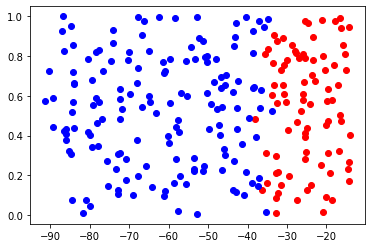

In [91]:
def kernel_between_matrix(kernel_matrix, k_matrix, class_kernel_matrix,m=200):
    M = None
    for i, ckm in enumerate(class_kernel_matrix):
        n = len(class_kernel_matrix[i])
        temp = np.reshape(np.sum(ckm - k_matrix, axis=0), (m, 1))
        if M is None:
            M = 1/float(n)*np.matmul(temp, temp.T)
            continue
        M += 1/(float(n))*np.matmul(temp, temp.T)
    return M


def kernel_within_matrix(kernel_matrix, class_kernel_matrix,m=200):
    N = None
    for i, ckm in enumerate(class_kernel_matrix):
        n = len(class_kernel_matrix[i])
        mid = np.identity(n) - (np.ones((n, n))/float(n))
        print(np.shape(mid))
        if N is None:
            test = np.matmul(np.transpose(ckm), mid)
            N = np.matmul(test, ckm)
            continue
        N += np.matmul(np.matmul(np.transpose(ckm), mid), ckm)
    eps=1*np.diag(np.repeat(100, m))
    return N + eps


M = kernel_between_matrix(kernel_matrix, k_matrix, class_kernel_matrix,matrix_m)

N = kernel_within_matrix(kernel_matrix, class_kernel_matrix,matrix_m)


# eigenvalue problem
vals, vecs = np.linalg.eig(np.dot(np.linalg.inv(N), M))
eig_pairs = [(np.abs(vals[i]), vecs[:,i]) for i in range(len(vals))]
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

w_circle_kernel = eig_pairs[0][1] # highest  


# Visualize
ex_circle_0 = np.array([np.dot(w_circle_kernel, d) for d in class_kernel_matrix[0]])
ex_circle_1 = np.array([np.dot(w_circle_kernel, d) for d in class_kernel_matrix[1]])


plt.scatter(ex_circle_0, np.random.rand(len(ex_circle_0)), color='red')
plt.scatter(ex_circle_1, np.random.rand(len(ex_circle_1)), color='blue')


In [ ]:
def square_kernel(x, y, d=3):
    return (1 + np.dot(x.T, y)) ** d